**Part 1: Preparation**

## Libraries

In [4]:
import numpy as np

import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import joblib

from pathlib import Path

In [5]:
s = 'numpy==' + str(np.__version__)
s += '\npandas==' + str(pd.__version__)
s += '\nmatplotlib==' + str(matplotlib.__version__)
s += '\nseaborn==' + str(sns.__version__)
s += '\nsklearn==' + str(sklearn.__version__)
# s += '\npickle==' + str(pickle.format_version)

print('DA SALVARE IN UN FILE REQUIREMENTS.TXT')
print(s)

DA SALVARE IN UN FILE REQUIREMENTS.TXT
numpy==1.21.6
pandas==1.3.5
matplotlib==3.2.2
seaborn==0.11.2
sklearn==1.0.2


In [6]:
# mount Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
# constants
RANDOM_STATE = 0
MARKER_SIZE = 20
COLORMAP = 'viridis'
COLORMAP_DIVERGENT = 'RdBu'
FIGSIZE = (8,8)

# visualization settings
plt.rcParams["figure.figsize"] = FIGSIZE

## Import data

In [8]:
base_path = "/content/gdrive/MyDrive/industrylab/"
df = pd.read_csv(base_path + "Data/Original/Bacino idrico.csv")

In [9]:
df.columns = ['data', 'p1', 'p2', 'p3', 'p4', 'p5', 't5', 'livello', 'portata']
df["data"] = pd.to_datetime(df["data"], format='%d/%m/%Y')
df.set_index("data", inplace=True)
df

,p1,p2,p3,p4,p5,t5,livello,portata
data,,,,,,,,
2003-01-06,NaN,NaN,NaN,NaN,NaN,NaN,30.70,9.6
2003-01-07,NaN,NaN,NaN,NaN,NaN,NaN,30.70,9.5
2003-01-08,NaN,NaN,NaN,NaN,NaN,NaN,30.67,9.5
2003-01-09,NaN,NaN,NaN,NaN,NaN,NaN,30.66,7.2
2003-01-10,NaN,NaN,NaN,NaN,NaN,NaN,30.64,6.2
...,...,...,...,...,...,...,...,...
2020-06-26,0.0,0.0,0.0,0.0,0.0,22.50,29.85,0.6
2020-06-27,0.0,0.0,0.0,0.0,0.0,23.40,29.84,0.6
2020-06-28,0.0,0.0,0.0,0.0,0.0,21.50,29.83,0.6


## Exploration

In [ ]:
df.dtypes

p1         float64
p2         float64
p3         float64
p4         float64
p5         float64
t5         float64
livello    float64
portata    float64
dtype: object

In [ ]:
df.describe()

,p1,p2,p3,p4,p5,t5,livello,portata
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,6025.000000,6386.000000,6386.000000
mean,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,28.571961,2.784619
std,6.650012,8.903134,7.166643,7.655847,8.025121,6.944029,2.196148,4.098431
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,22.530000,0.450000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,26.930000,0.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,29.265000,1.500000
75%,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,30.430000,3.000000
max,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,31.760000,74.650000


In [ ]:
df.isnull().sum() * 100 / len(df)

p1         5.637332
p2         5.637332
p3         5.637332
p4         5.637332
p5         5.637332
t5         5.652991
livello    0.000000
portata    0.000000
dtype: float64

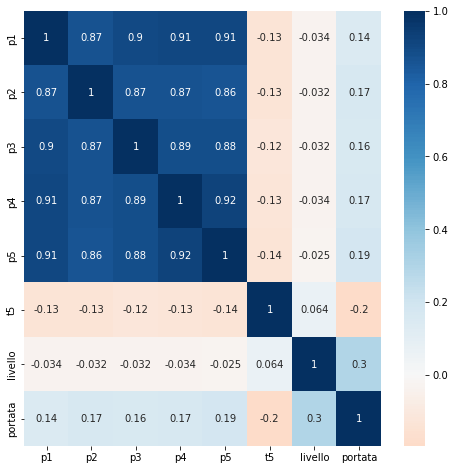

In [ ]:
sns.heatmap(df.corr(), cmap=COLORMAP_DIVERGENT, annot=True, center=0)

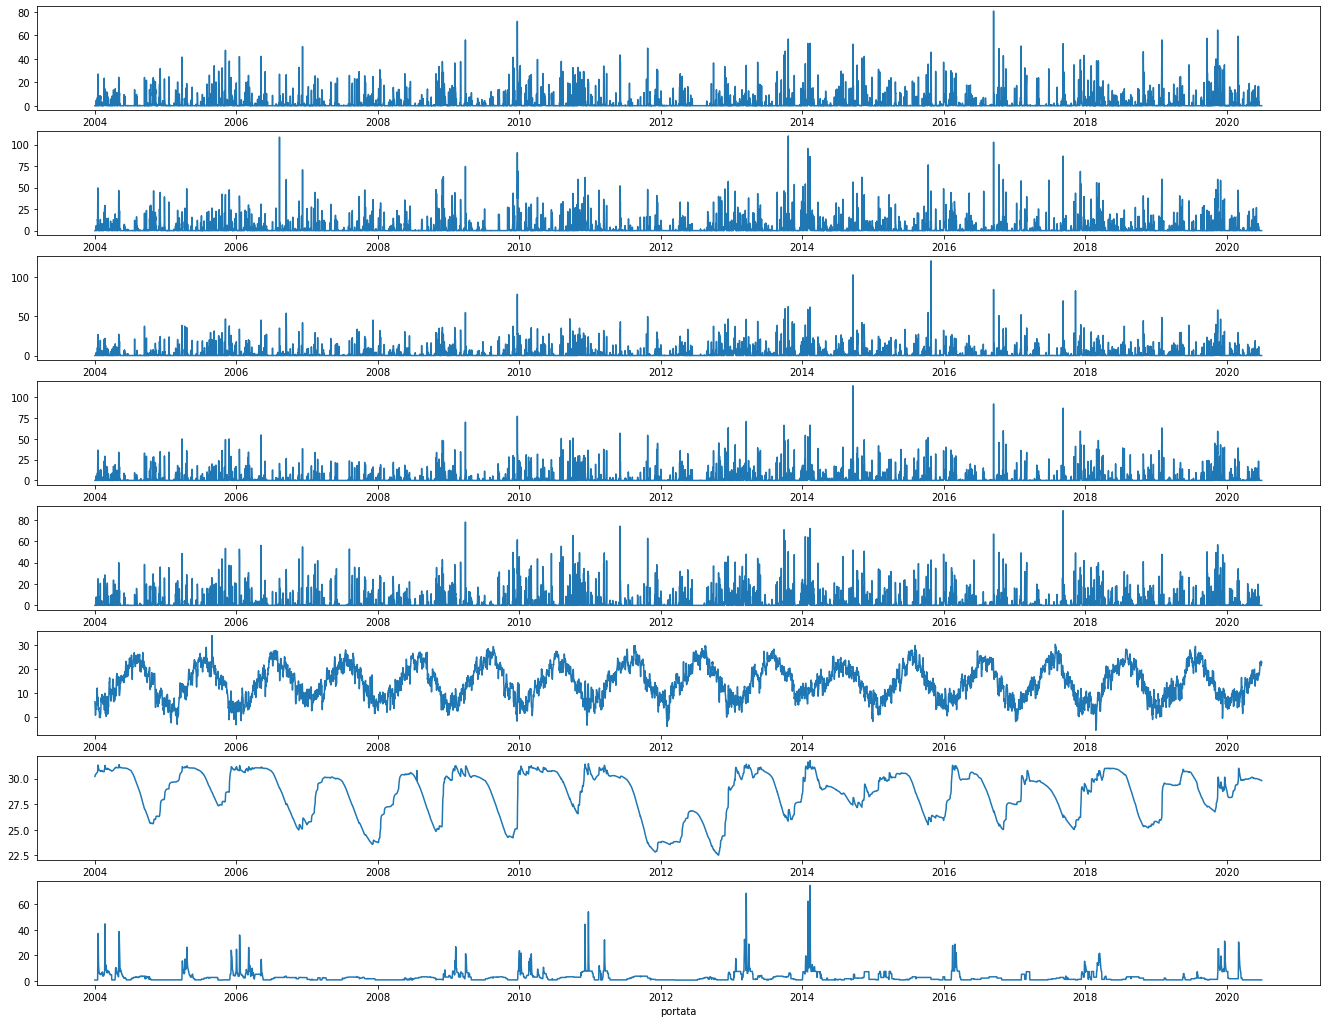

In [ ]:
tmp = df['2004-01-02':]
for i in range(8):
  plt.subplot(8, 1, i+1)
  plt.plot(tmp[tmp.columns[i]])
  plt.xlabel(tmp.columns[i])
plt.rcParams["figure.figsize"] = (23, 18) #solo per questa viz
plt.show();

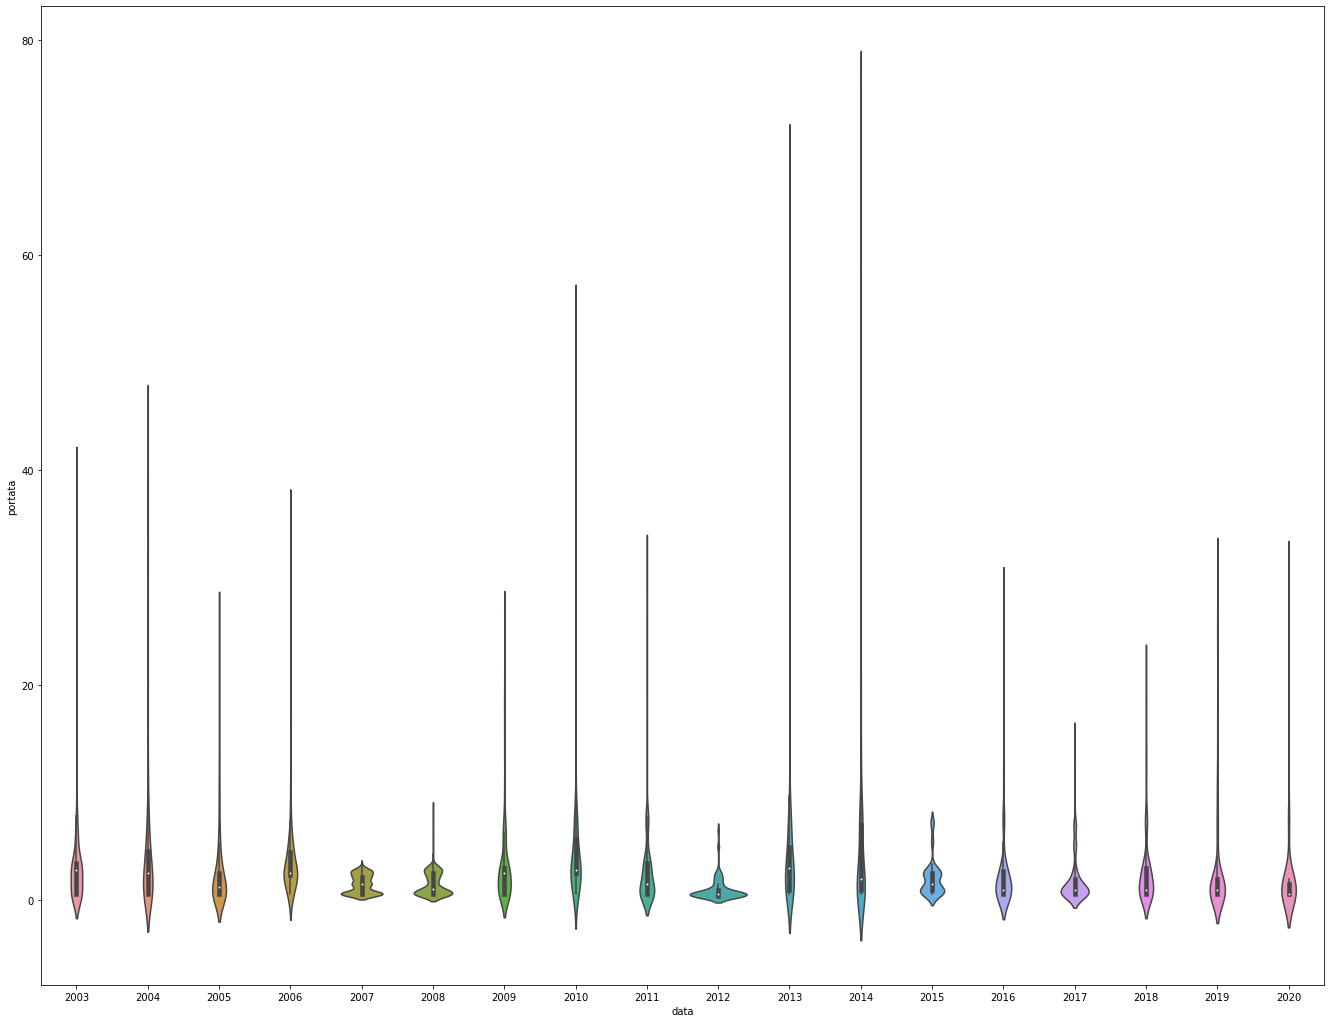

In [ ]:
ax = sns.violinplot(x=df.index.year, y="portata", data=df)

BOXPLOT MESI


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


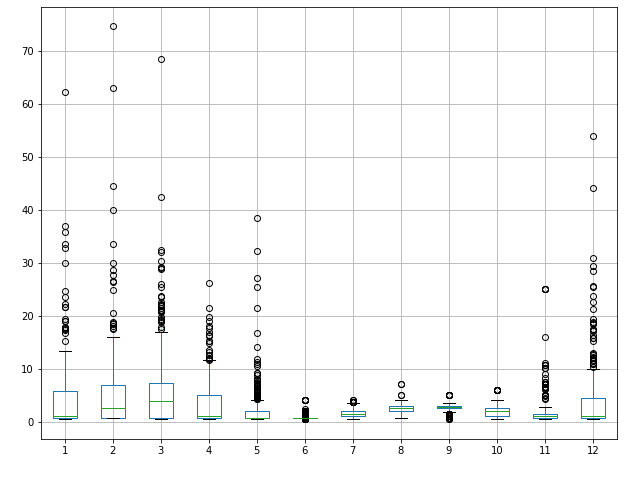

In [ ]:
plt.rcParams["figure.figsize"] = (10, 8)
def boxplot(df, x, y):
  ax = df.boxplot(by=x, column=y)
  plt.title('')
  plt.suptitle('')
  ax.set_title('')
  ax.set_xlabel(' ')
  ax.set_ylabel(' ')
  ax = plt.show()



print("BOXPLOT MESI")
boxplot(df, df.index.month, 'portata')

BOXPLOT MESI


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


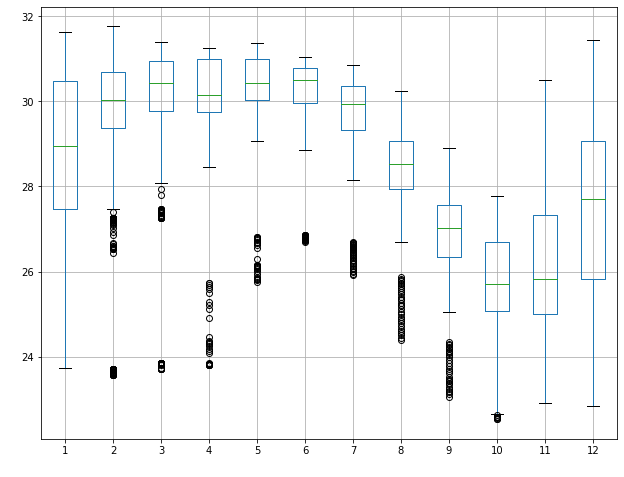

In [ ]:
print("BOXPLOT MESI")
boxplot(df, df.index.month, 'livello')

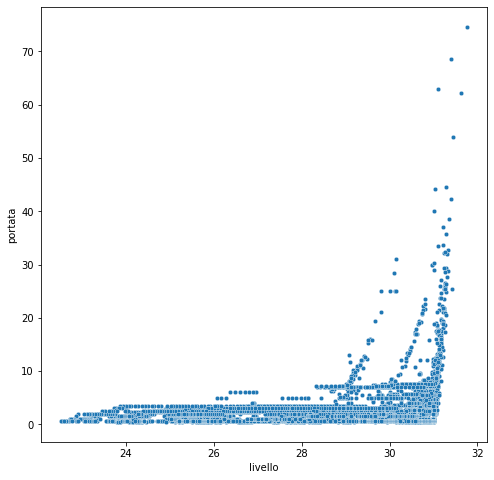

In [ ]:
plt.rcParams["figure.figsize"] = FIGSIZE
sns.scatterplot(data=df,x="livello", y="portata", s=MARKER_SIZE, palette=COLORMAP);

In [ ]:
df.isnull().sum() * 100 / len(df)

p1         5.637332
p2         5.637332
p3         5.637332
p4         5.637332
p5         5.637332
t5         5.652991
livello    0.000000
portata    0.000000
dtype: float64

In [ ]:
raw_df_month_lu = df["livello"].resample('M').mean() #faccio media mensile
raw_df_year_lu = df["livello"].resample('Y').mean() #faccio media annuale

In [ ]:
raw_df_month_pu = df["portata"].resample('M').mean() #faccio media mensile
raw_df_year_pu = df["portata"].resample('Y').mean() #faccio media annuale

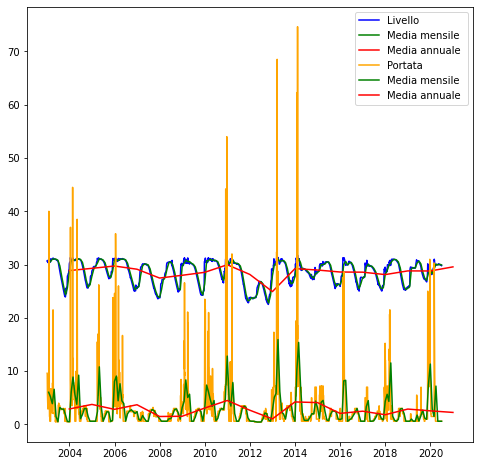

In [ ]:
#plt.figure(figsize=(15,5))
plt.plot(df["livello"], color = 'blue', label = 'Livello')
plt.plot(raw_df_month_lu, color='green', label = 'Media mensile ')
plt.plot(raw_df_year_lu, color='red', label = 'Media annuale ')
plt.legend(loc='best')

plt.plot(df["portata"], color = 'orange', label = 'Portata')
plt.plot(raw_df_month_pu, color='green', label = 'Media mensile ')
plt.plot(raw_df_year_pu, color='red', label = 'Media annuale ')
plt.legend(loc='best')

plt.show()

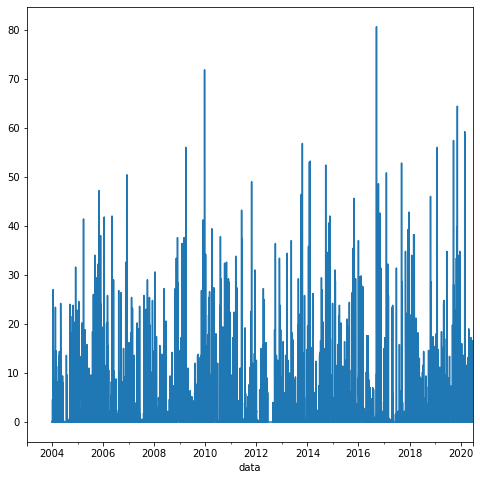

In [ ]:
df['p1'].plot()

In [ ]:
sns.heatmap(df.corr(), cmap=COLORMAP_DIVERGENT, annot=True, center=0)

## Generate data

In [10]:
def multivariate_data(dataset, 
                      target, 
                      start_index, 
                      end_index, 
                      history_size,
                      target_size, 
                      step, 
                      single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        # print(list(indices))
        data.append(dataset[indices])

        try:
          if single_step:
              labels.append(target[i+target_size]) # precedenti -i
          else:
              labels.append(target[i:i+target_size])
        except Exception as e:
          print(target_size)
          print(i)
          print(e)


    return np.array(data), np.array(labels)

In [11]:
df.loc['2004-01-01', 't5'] = 8.0 # unico valore mancante
df = df.dropna()

In [12]:
for feature in ['livello', 'portata']:

  X = df.copy()
  y = X.pop(feature)

  # split train, val, test
  X_train, X_1, y_train, y_1 = train_test_split(X, y, test_size=0.2, random_state=11, shuffle=False)
  X_val, X_test, y_val, y_test = train_test_split(X_1, y_1, test_size=0.5, random_state=11, shuffle=False) 

  # normalize X
  x_scaler = MinMaxScaler(feature_range=(0, 1))
  X_train = pd.DataFrame(x_scaler.fit_transform(X_train), columns=X_train.columns)
  X_val = pd.DataFrame(x_scaler.transform(X_val), columns=X_val.columns)
  X_test = pd.DataFrame(x_scaler.transform(X_test), columns=X_test.columns)

  # normalize y
  y_scaler = MinMaxScaler(feature_range=(0, 1))
  y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))
  y_val = y_scaler.transform(np.array(y_val).reshape(-1, 1))
  y_test = y_scaler.transform(np.array(y_test).reshape(-1, 1))

  # save scaler
  joblib.dump(y_scaler, base_path+'Models/scaler_' + feature + '.joblib') 

  # generate files for each attempt
  for offset in [1, 3, 5, 7, 14, 21, 28]: # quanti giorni prima guardare (t-offset)--> (quanti giorni prima fermarci da t) 
     for prev in [1,3,5,7,14,21,28,42,56,70,84,98,112]: # quanti giorni guardare (partendo da t-offset) (quanti giorni )
      x_train_single, y_train_single = multivariate_data(
          X_train.values, 
          y_train, 
          0, # parte dal punto 0
          len(y_train) - offset, # rimuovo dati per i quali non ho campioni a sufficienza
          prev , # numero di campioni che guardo
          offset - 1, # distanza offset dai campioni
          1, # output_size
          single_step=True # step boh, single?
      )

      x_val_single, y_val_single = multivariate_data(
          X_val.values, 
          y_val, 
          0, # parte dal punto 0
          len(y_val) - offset, # rimuovo dati per i quali non ho campioni a sufficienza
          prev , # numero di campioni che guardo
          offset - 1, # distanza offset dai campioni
          1, # output_size
          single_step=True # step boh, single?
      )

      x_test_single, y_test_single = multivariate_data(
          X_test.values, 
          y_test, 
          0, # parte dal punto 0
          len(y_test) - offset, # rimuovo dati per i quali non ho campioni a sufficienza
          prev , # numero di campioni che guardo
          offset - 1, # distanza offset dai campioni
          1, # output_size
          single_step=True # step boh, single?
      )
      
      # save files
      cur_path = base_path + "Data/Prepared/offset" + str(offset) + "_prev" + str(prev) + "/"
      Path(cur_path).mkdir(parents=True, exist_ok=True)

      train_filename = cur_path + "train_prep_" + feature + "_x.npy"
      val_filename = cur_path + "val_prep_" + feature + "_x.npy"
      test_filename = cur_path + "test_prep_" + feature + "_x.npy"
      np.save(train_filename, x_train_single)
      np.save(val_filename, x_val_single)
      np.save(test_filename, x_test_single)

      train_filename = cur_path + "train_prep_" + feature + "_y.npy"
      val_filename = cur_path + "val_prep_" + feature + "_y.npy"
      test_filename = cur_path + "test_prep_" + feature + "_y.npy"
      np.save(train_filename, y_train_single)
      np.save(val_filename, y_val_single)
      np.save(test_filename, y_test_single)